In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits,ascii
import pandas as pd
import cmasher as cmr

In [39]:
sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
sample = sample[sample["v_asym_g"]/sample["v_asym_g_err"]>3]
sample = sample[sample["v_asym_s"]/sample["v_asym_s_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
ssp = pd.read_csv("MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
prospect= prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
bpt= bpt[bpt["MAGPIID"].isin(sample["MAGPIID"])]
ssp= ssp[ssp["MAGPIID"].isin(sample["MAGPIID"])]

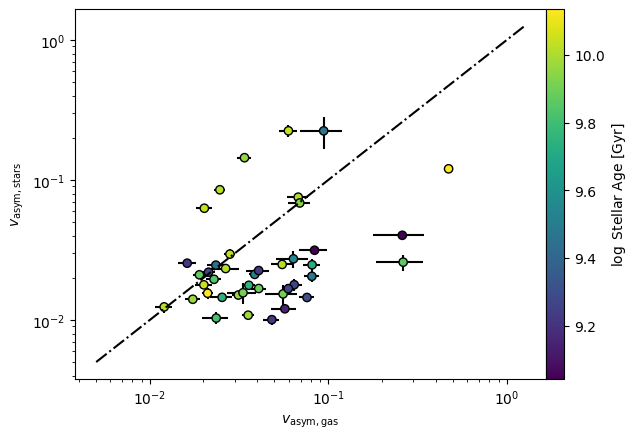

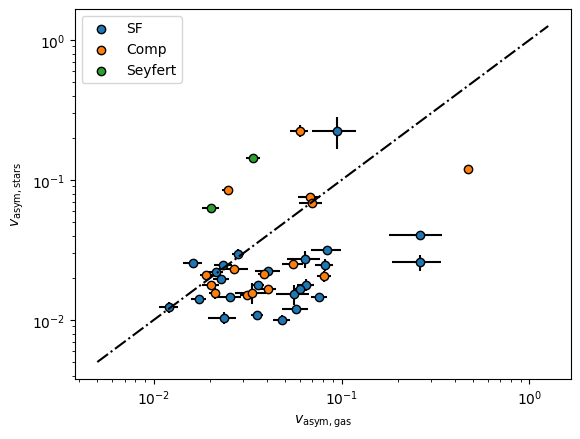

In [40]:
vg = sample["v_asym_g"].to_numpy()
vg_err = sample['v_asym_g_err'].to_numpy()
vs = sample["v_asym_s"].to_numpy()
vs_err = sample["v_asym_s_err"].to_numpy()

fig,ax = plt.subplots()
p=ax.scatter(vs,vg,ec="k",c=ssp["logage_MW_2re"].to_numpy(),zorder=2)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,fmt=".k",zorder=1)
ax.plot(np.logspace(-2.3,0.1),np.logspace(-2.3,0.1),ls='dashdot',color="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$v_{\rm asym,gas}$")
ax.set_ylabel(r"$v_{\rm asym,stars}$")
plt.colorbar(p,ax=ax,label=r"$\log$ Stellar Age [Gyr]",pad=0,fraction=0.05)
plt.show()

fig,ax = plt.subplots()
for i,lab in zip([1,0,2],["SF","Comp","Seyfert"]):
    ax.scatter(vs[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],vg[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==i],
               ec="k",zorder=2,label=lab)
    ax.errorbar(vs[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],vg[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],
                xerr=vs_err[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],
                yerr=vg_err[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],fmt=".k",zorder=1)
ax.plot(np.logspace(-2.3,0.1),np.logspace(-2.3,0.1),ls='dashdot',color="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$v_{\rm asym,gas}$")
ax.set_ylabel(r"$v_{\rm asym,stars}$")
ax.legend()
plt.show()

/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_7327/200627606.py:16: RuntimeWarning: divide by zero encountered in log10
  if 0.5 > (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > -1:
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_7327/200627606.py:18: RuntimeWarning: divide by zero encountered in log10
  if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > 0.5:
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_7327/200627606.py:20: RuntimeWarning: divide by zero encountered in log10
  if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) < -1:
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_7327/200627606.py:34: RuntimeWarning: divide by zero encountered in log10
  p=ax.scatter(prospect["StellarMass_median"],bpt['SFR, dust corrected'],ec=colors,c=np.log10(sample['v_asym_s'].to_numpy()),


107


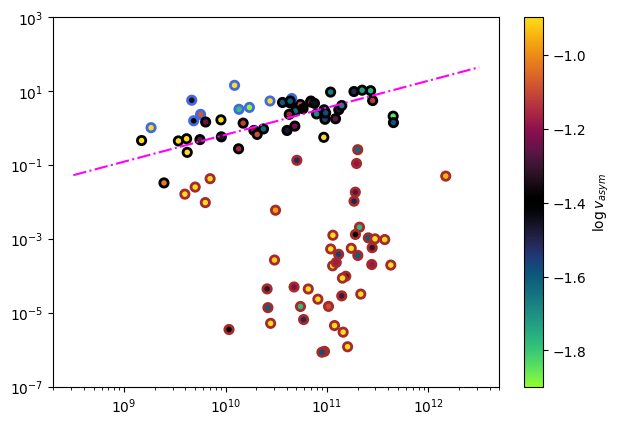

In [45]:
xx = np.logspace(8.5,12.5, 55)
MS = (xx**0.730)*(10**-7.482)

sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#sample = sample[sample["v_asym_g"]/sample["v_asym_g_err"]>3]
#sample = sample[sample["v_asym_s"]/sample["v_asym_s_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
ssp = pd.read_csv("MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
prospect= prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
bpt= bpt[bpt["MAGPIID"].isin(sample["MAGPIID"])]
ssp= ssp[ssp["MAGPIID"].isin(sample["MAGPIID"])]

D_SFR = []
for x,y in zip(prospect["StellarMass_median"].to_numpy(),bpt["SFR, dust corrected"].to_numpy()):
    if 0.5 > (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > -1:
        D_SFR.append(1) # Star Forming
    if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > 0.5:
        D_SFR.append(2) # Starbursting
    if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) < -1:
        D_SFR.append(0)
colors=[]
for i in D_SFR:
    if i==1:
        colors.append("k")
    if i==2:
        colors.append("royalblue")
    if i==0:
        colors.append("brown")
colors=np.array(colors)
colors=np.array(colors)
print(len(bpt["SFR, dust corrected"]))
fig,ax = plt.subplots()
p=ax.scatter(prospect["StellarMass_median"],bpt['SFR, dust corrected'],ec=colors,c=np.log10(sample['v_asym_s'].to_numpy()),
             cmap="cmr.wildfire", vmin=np.log10(0.04)-0.5, vmax=np.log10(0.04)+0.5, lw=2)
ax.plot(xx,MS,ls="dashdot",c="magenta")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-7,1e3)
plt.colorbar(p,ax=ax,fraction=0.05,pad=0.05, label=r"$\log v_{asym}$")
plt.savefig("plots/new_SFMS.pdf",bbox_inches="tight")

In [ ]:
#sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#sample = sample.dropna()
#sample = sample[sample["v_asym_s"]/sample["v_asym_s_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")

# SFMS & Mass
t = ascii.read("MAGPI_csv/MAGPI_Balmer_SFRs_onedspec.tbl")
df=pd.DataFrame({"MAGPIID":np.array(t['MAGPI_ID']),
                "SFR":np.array(t["SFR"]),
                "SFR_err":np.array(t["SFR_err"])})
df1 = df[df["MAGPIID"].isin(sample["MAGPIID"])]
df2 = df[~df["MAGPIID"].isin(sample["MAGPIID"])]
SFR = df1["SFR"].to_numpy()
SFR_err = df1["SFR_err"].to_numpy()
SFR_2 = df2["SFR"].to_numpy()
M_sol = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]["StellarMass_median"].to_numpy()
M_sol_err = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]["StellarMass_16"].to_numpy()
M_sol_2 = prospect[prospect["MAGPIID"].isin(df2["MAGPIID"])]["StellarMass_median"].to_numpy()
xx = np.logspace(7.5,11.5, 55)
MS = (xx**0.730)*(10**-7.482)

# Environment
env = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv")
N_Gals = env[env["MAGPIID"].isin(sample["MAGPIID"])]["N_Gals"]
not_N_gals = env[~env["MAGPIID"].isin(sample["MAGPIID"])]["N_Gals"]

# Sersic
file1 = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file1 = file1.dropna()
file1 = file1.drop_duplicates(["MAGPIID"])
galfit = pd.read_csv("MAGPI_csv/MAGPI_GalfitSersicCat_v0.0.csv")
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
n2 = galfit["n"]
n2 = n2[n2 > 0]
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
sample = sample[sample["MAGPIID"].isin(prospect["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(prospect["MAGPIID"])]
n = galfit["n"]
n = n[n > 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# Sersic
ax1.hist(n, zorder=2, label="Subsample", bins=10)
ax1.hist(n2, label="All Galaxies", color="k", bins=20, alpha=0.2)
ax1.text(s=f"Median={np.median(n):.2f}", x=3, y=100)
ax1.text(s=f"Mean={np.mean(n):.2f}", x=3, y=60)
#ax.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"S$\'{e}$rsic Index")
ax1.legend()
# Environment
ax2.hist(N_Gals, label="Subsample", zorder=2)
#ax2.hist(N_Gals_0, zorder=2, label="No Env. Metrics")
ax2.hist(not_N_gals, label="All Galaxies", color="k", alpha=0.2, zorder=1)
ax2.set_yscale("log")
ax2.set_xlabel("Group Multiplicity")
ax2.text(s=f"Median={np.median(N_Gals):.0f}", x=8, y=100)
ax2.text(s=f"Mean={np.mean(N_Gals):.0f}", x=8, y=60)
ax2.legend()
ax2.set_xlim(1.05,21.05)
# Mass
ax3.hist(np.log10(M_sol), zorder=2, label="Subsample", bins=10)
ax3.hist(np.log10(M_sol_2), label="All Galaxies", color="k", bins=20, alpha=0.2)
ax3.text(s=f"Median={np.median(np.log10(M_sol)):.2f}", x=8, y=30)
ax3.text(s=f"Mean={np.mean(np.log10(M_sol)):.2f}", x=8, y=20)
#ax.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlabel(r"$\log$Stellar Mass [M$_\odot$]")
ax3.legend()
# SFMS
ax4.scatter(M_sol, SFR, zorder=3, label="Subsample", ec="k")
ax4.errorbar(M_sol, SFR, xerr=M_sol_err, yerr=SFR_err, zorder=2, fmt=".c", ls="")
ax4.scatter(M_sol_2, SFR_2, zorder=1, alpha=0.2, c="k", label="All Galaxies")
ax4.plot(xx, MS, ls="dashdot", c="magenta")
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_ylim(1e-6, 300)
ax4.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax4.set_ylabel(r"Star Formation Rate [M$_\odot$ yr$^{-1}$]")
ax4.legend()
for ax in [ax2, ax4]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
plt.subplots_adjust(hspace=0.2, wspace=0.1)
plt.savefig("plots/SFMS_Mass_Sersic_Env.pdf", bbox_inches="tight")